<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** 
- Christa Itzel Barrios Martinez
- Javier Alejandro Contreras Figueroa

**Fecha:** 12 de marzo del 2024.

**Expediente** : 
- 739328
- 739708
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/ChristaBarrios/Tarea_5_CIBarrios_JAContreras.git

# Tarea 5: Clase 13

Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Código de solución estudiante 1

## Código de solución estudiante 2

In [1]:
# Paqueterías necesarias univariado
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

2024-03-12 17:00:58.105473: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 17:00:58.299225: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 17:00:58.942988: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 17:01:01.270002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Univariado


In [3]:
df = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']]
df

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000
...,...,...,...,...,...,...
540,3000,2,1,1,2,1820000
541,2400,3,1,1,0,1767150
542,3620,2,1,1,0,1750000
543,2910,3,1,1,0,1750000


In [4]:
df.dtypes

area         int64
bedrooms     int64
bathrooms    int64
stories      int64
parking      int64
price        int64
dtype: object

In [5]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
# Definir la secuencia de entrada
raw_seq = data['price'].values
# Elegir un número de pasos de tiempo
n_steps = 3
# Número de características de mis datos
n_features = 1
# Dividir en muestras
X, y = split_univariate_sequence(raw_seq, n_steps)

print('X', X, 'y', y, sep='\n')

X
[[13300000 12250000 12250000]
 [12250000 12250000 12215000]
 [12250000 12215000 11410000]
 ...
 [ 1855000  1820000  1767150]
 [ 1820000  1767150  1750000]
 [ 1767150  1750000  1750000]]
y
[12215000 11410000 10850000 10150000 10150000  9870000  9800000  9800000
  9681000  9310000  9240000  9240000  9100000  9100000  8960000  8890000
  8855000  8750000  8680000  8645000  8645000  8575000  8540000  8463000
  8400000  8400000  8400000  8400000  8400000  8295000  8190000  8120000
  8080940  8043000  7980000  7962500  7910000  7875000  7840000  7700000
  7700000  7560000  7560000  7525000  7490000  7455000  7420000  7420000
  7420000  7350000  7350000  7350000  7350000  7343000  7245000  7210000
  7210000  7140000  7070000  7070000  7035000  7000000  6930000  6930000
  6895000  6860000  6790000  6790000  6755000  6720000  6685000  6650000
  6650000  6650000  6650000  6650000  6650000  6629000  6615000  6615000
  6580000  6510000  6510000  6510000  6475000  6475000  6440000  6440000
  64190

In [7]:
# Modelo con CNN
# Definimos
model_1 = Sequential()
model_1.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

/home/javier/MyDesktop/ICD/6to/MNLP/05_Tarea5/t5/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,493 (13.64 KB)

 Trainable params: 3,493 (13.64 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
X.shape

(542, 3)

In [9]:
# reshape de [samples, timesteps] a [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[13300000],
        [12250000],
        [12250000]],

       [[12250000],
        [12250000],
        [12215000]],

       [[12250000],
        [12215000],
        [11410000]],

       ...,

       [[ 1855000],
        [ 1820000],
        [ 1767150]],

       [[ 1820000],
        [ 1767150],
        [ 1750000]],

       [[ 1767150],
        [ 1750000],
        [ 1750000]]])

In [10]:
y.shape

(542,)

In [11]:
# Ajustamos el modelo anterior
history_1 = model_1.fit(X, y, epochs=600, verbose=False)

<Axes: >

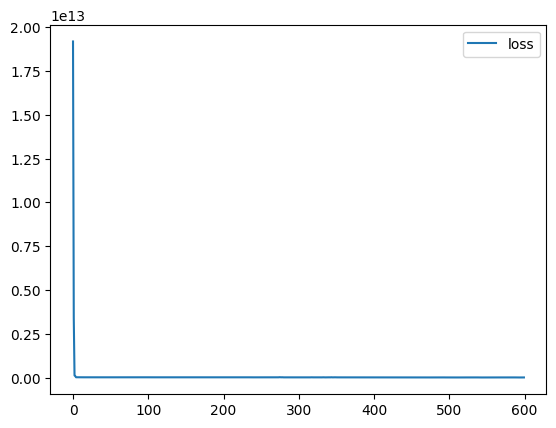

In [12]:
pd.DataFrame(history_1.history).plot()

In [13]:
# Probamos nuestro modelo 
x_input = np.array([13300000, 12250000, 12250000])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_1.predict(x_input, verbose=0)
yhat

array([[11687096.]], dtype=float32)

### Modelo varias entradas

In [14]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [15]:
n_steps = 3
X, y = split_multivariate_sequence(df.values, n_steps)

n_features = X.shape[2]

X.shape, y.shape

((543, 3, 5), (543,))

In [16]:
X[0], y[0]

(array([[7420,    4,    2,    3,    2],
        [8960,    4,    4,    4,    3],
        [9960,    3,    2,    2,    2]]),
 12250000)

In [17]:
# Definimos nuestro modelo
model_2 = Sequential()
model_2.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_2.add(MaxPooling1D())
model_2.add(Flatten())
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

/home/javier/MyDesktop/ICD/6to/MNLP/05_Tarea5/t5/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 2, 64)          │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,005 (15.64 KB)

 Trainable params: 4,005 (15.64 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Ajustamos el modelo anterior
history_2 = model_2.fit(X, y, epochs=800, verbose=False)

<Axes: >

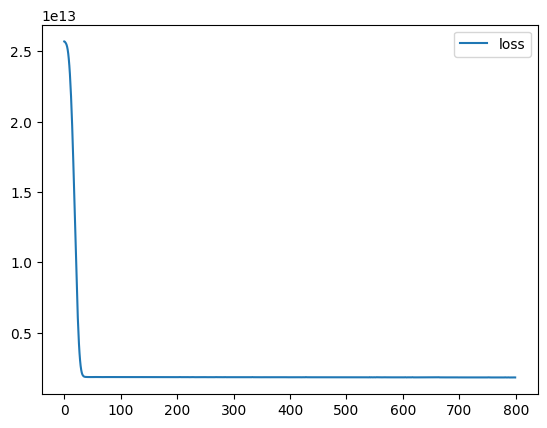

In [19]:
pd.DataFrame(history_2.history).plot()

In [20]:
# Probamos nuestro modelo 
x_input = np.array([[7420,    4,    2,    3,    2], [8960,    4,    4,    4,    3], [9960,    3,    2,    2,    2]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_2.predict(x_input, verbose=0)
yhat

array([[7862684.]], dtype=float32)

### Multiples encabezamientos

In [21]:
# Paqueterías faltantes
from keras.models import Model
from keras.layers import concatenate
from keras.utils import plot_model
from keras.layers import Input

In [22]:
n_features = 1
n_steps = 3

In [23]:
# Primer modelo de entrada
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

In [24]:
# Segundo modelo de entrada
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

# merge modelos de entrada
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

# Conectar entradas y salida del modelo
model_3 = Model(inputs=[visible1, visible2], outputs=output)

model_3.compile(optimizer='adam', loss='mse')

model_3.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 3, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 3, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 2, 64)     │        192 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 2, 64)     │        192 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 1, 64)     │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 1, 64)     │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 64)        │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 64)        │          0 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 50)        │      6,450 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         51 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,885 (26.89 KB)

 Trainable params: 6,885 (26.89 KB)

 Non-trainable params: 0 (0.00 B)

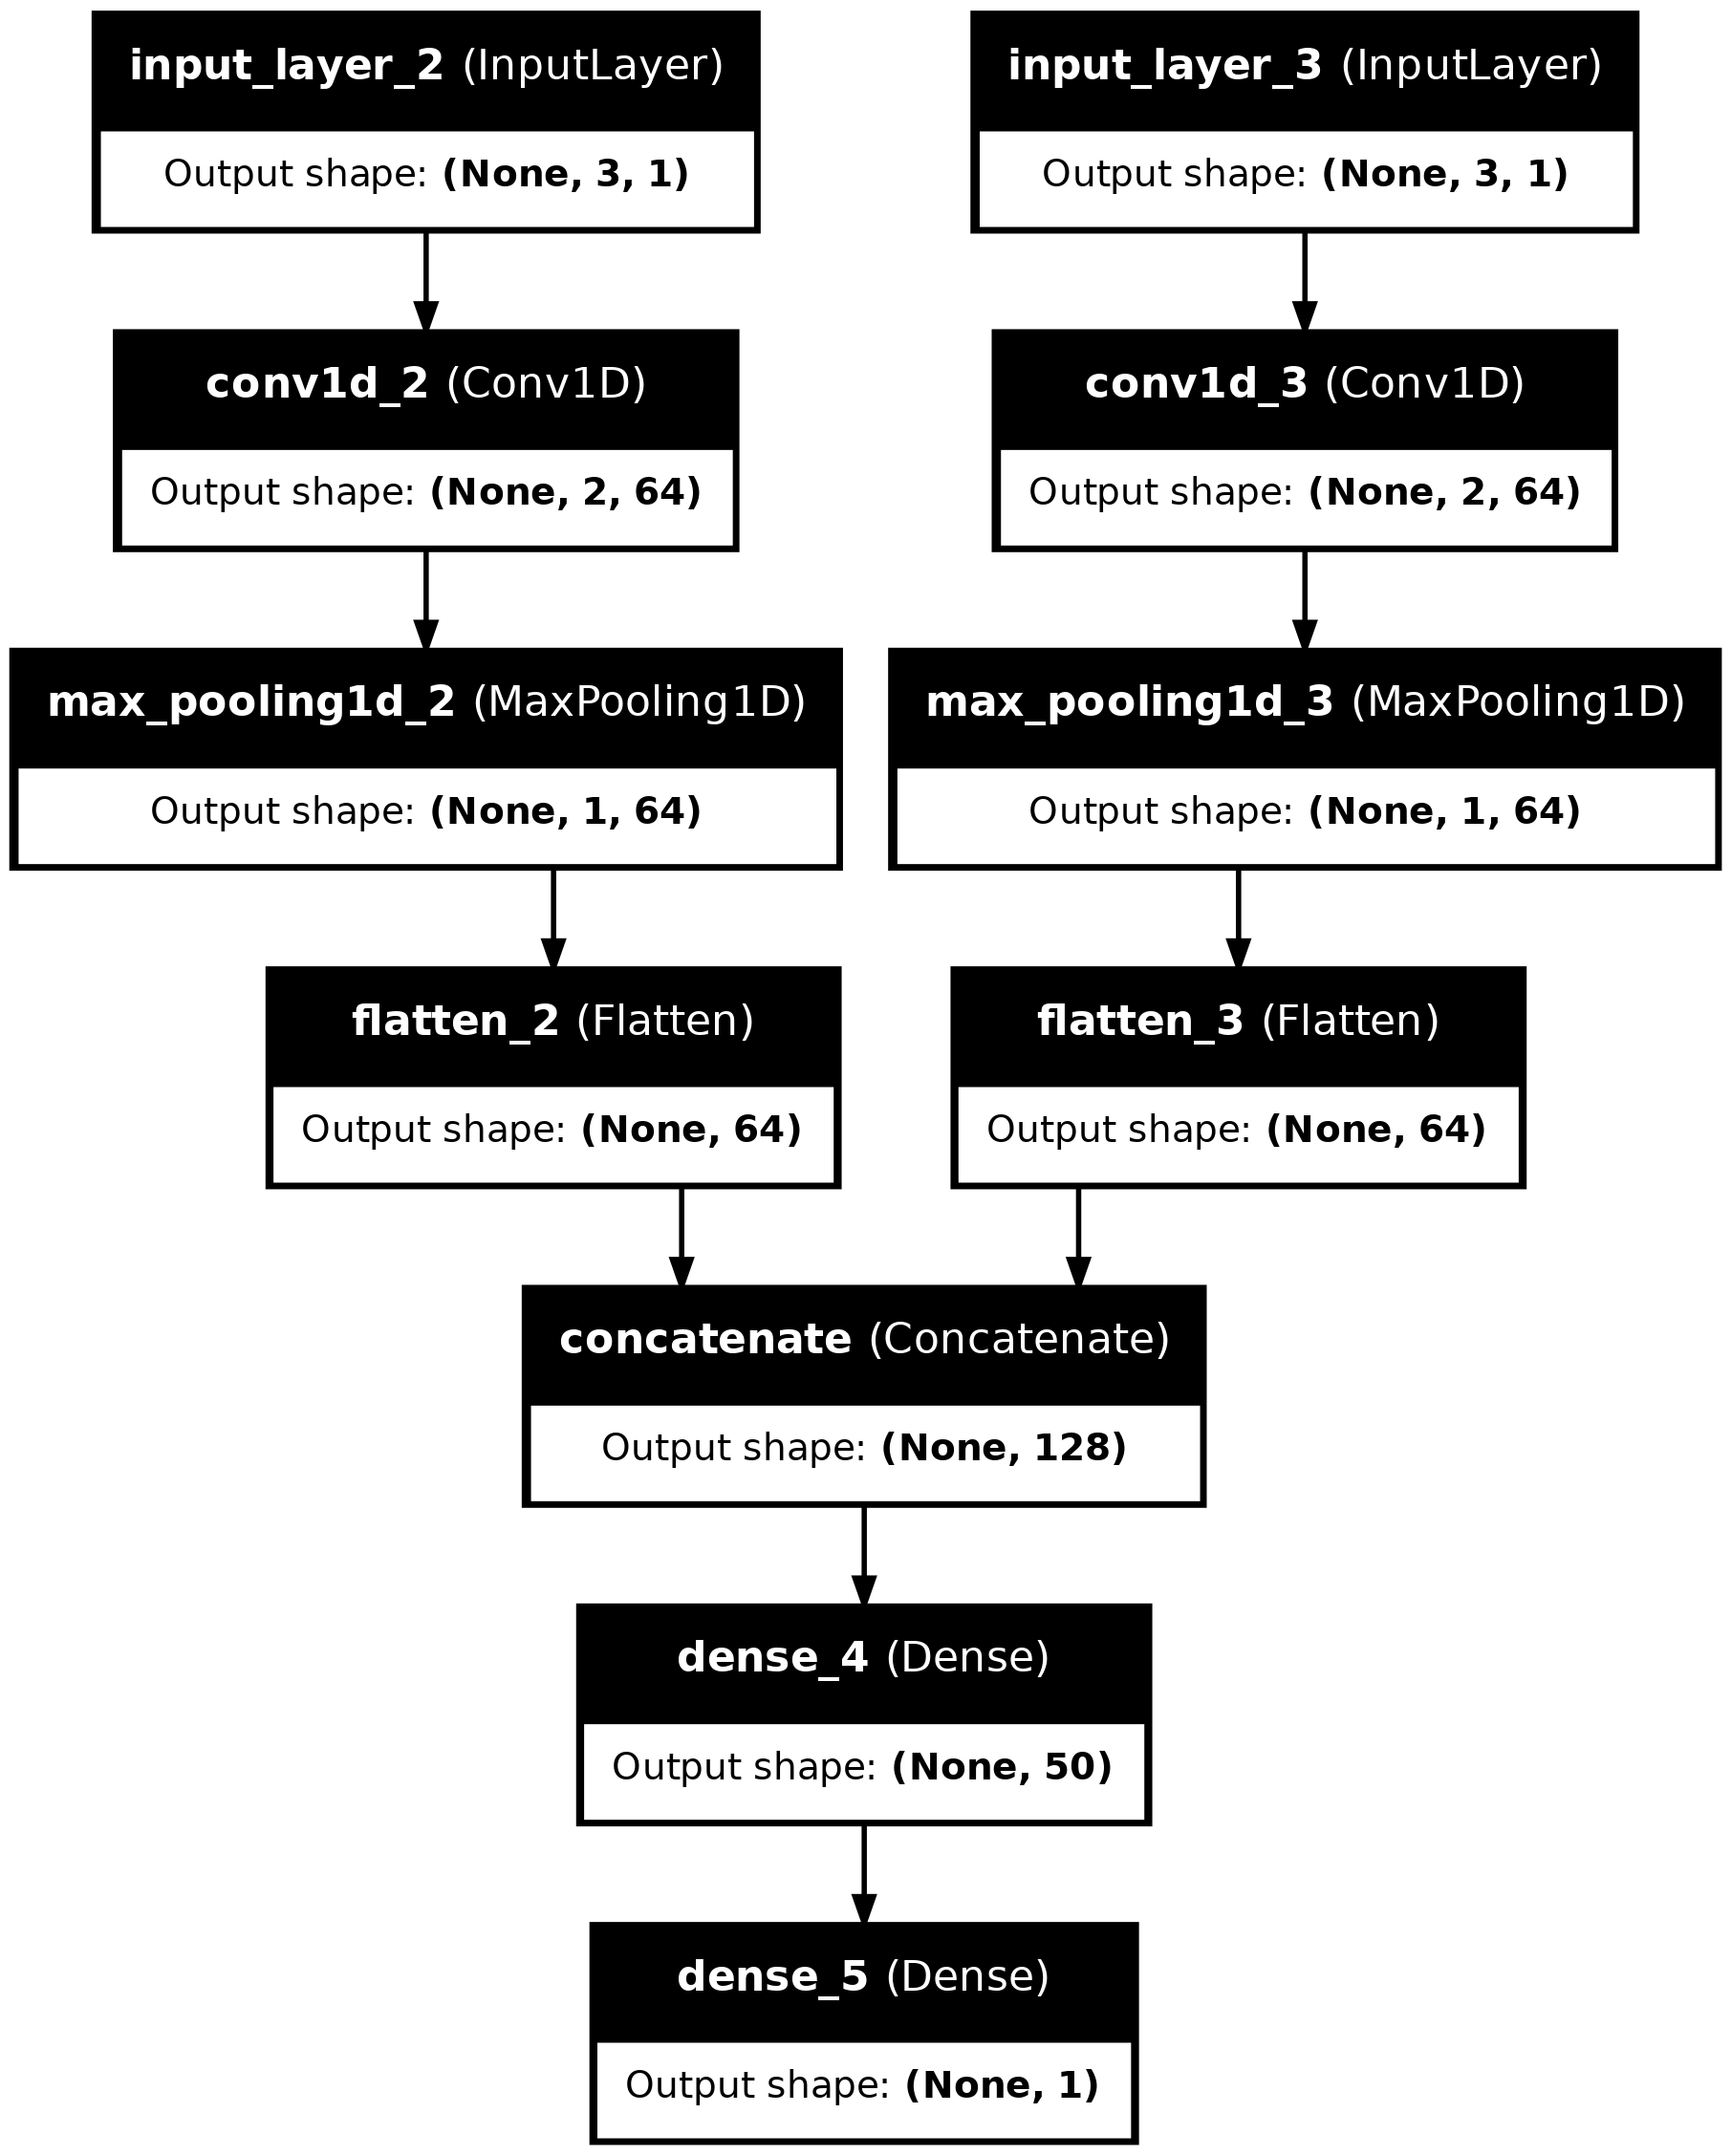

In [25]:
#  sudo apt install graphviz intalar este, por distribucion de ubuntu, ya que uso wsl, si no no funciona
from keras.utils import plot_model
import tensorflow as tf
# Graficar el modelo
plot_model(model_3, to_file='model.png', show_shapes=True, show_layer_names=True)

#tf.keras.utils.plot_model(model_3, to_file='model.png', show_shapes=True)


In [26]:
X[0].shape

(3, 5)

In [27]:
# Una serie de tiempo por submodelo
n_features = 1

# Separar datos de entrada
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)

X1.shape

(543, 3, 1)

In [28]:
# Con estos datos podemos ajustar el modelo
history_3 = model_3.fit([X1, X2], y, epochs=1000, verbose=0)

<Axes: >

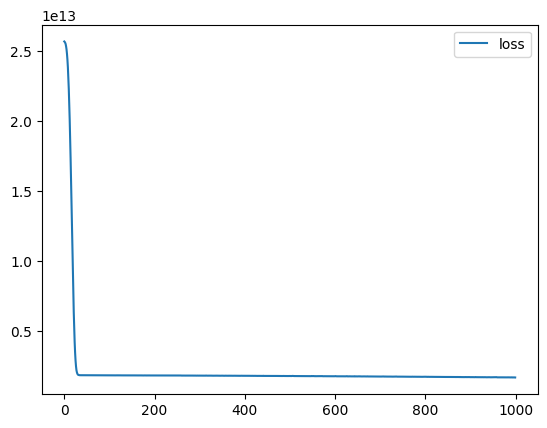

In [29]:
pd.DataFrame(history_3.history).plot()

### Multi paralela

In [30]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [31]:
n_steps = 3
X_m, y_m = split_multiple_forecasting_sequence(df.values, n_steps=3)

In [32]:
X_m.shape

(542, 3, 6)

In [33]:
print(X_m[0], y_m[0], sep='\n')

[[    7420        4        2        3        2 13300000]
 [    8960        4        4        4        3 12250000]
 [    9960        3        2        2        2 12250000]]
[    7500        4        2        2        3 12215000]


In [36]:
n_steps, X_m.shape[2]

(3, 6)

In [34]:
n_features = X_m.shape[2]

# define model_4
model_4 = Sequential()
model_4.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')

model_4.summary()

/home/javier/MyDesktop/ICD/6to/MNLP/05_Tarea5/t5/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 2, 64)          │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,388 (17.14 KB)

 Trainable params: 4,388 (17.14 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Ajustar el modelo
history_4 = model_4.fit(X_m, y_m, epochs=800, verbose=0)

<Axes: >

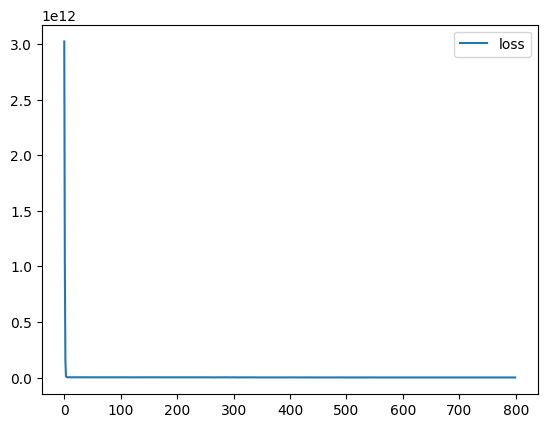

In [36]:
pd.DataFrame(history_4.history).plot()

### Multi-output

In [39]:
# Definimos el modelo
n_features = X_m.shape[2]

visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

In [40]:
# Definimos salida 1
output1 = Dense(1)(cnn)
# Definimos salida 2
output2 = Dense(1)(cnn)
# Definimos salida 3
output3 = Dense(1)(cnn)

In [41]:
# Ponemos todo junto
model_5 = Model(inputs=visible, outputs=[output1, output2, output3])
model_5.compile(optimizer='adam', loss='mse')

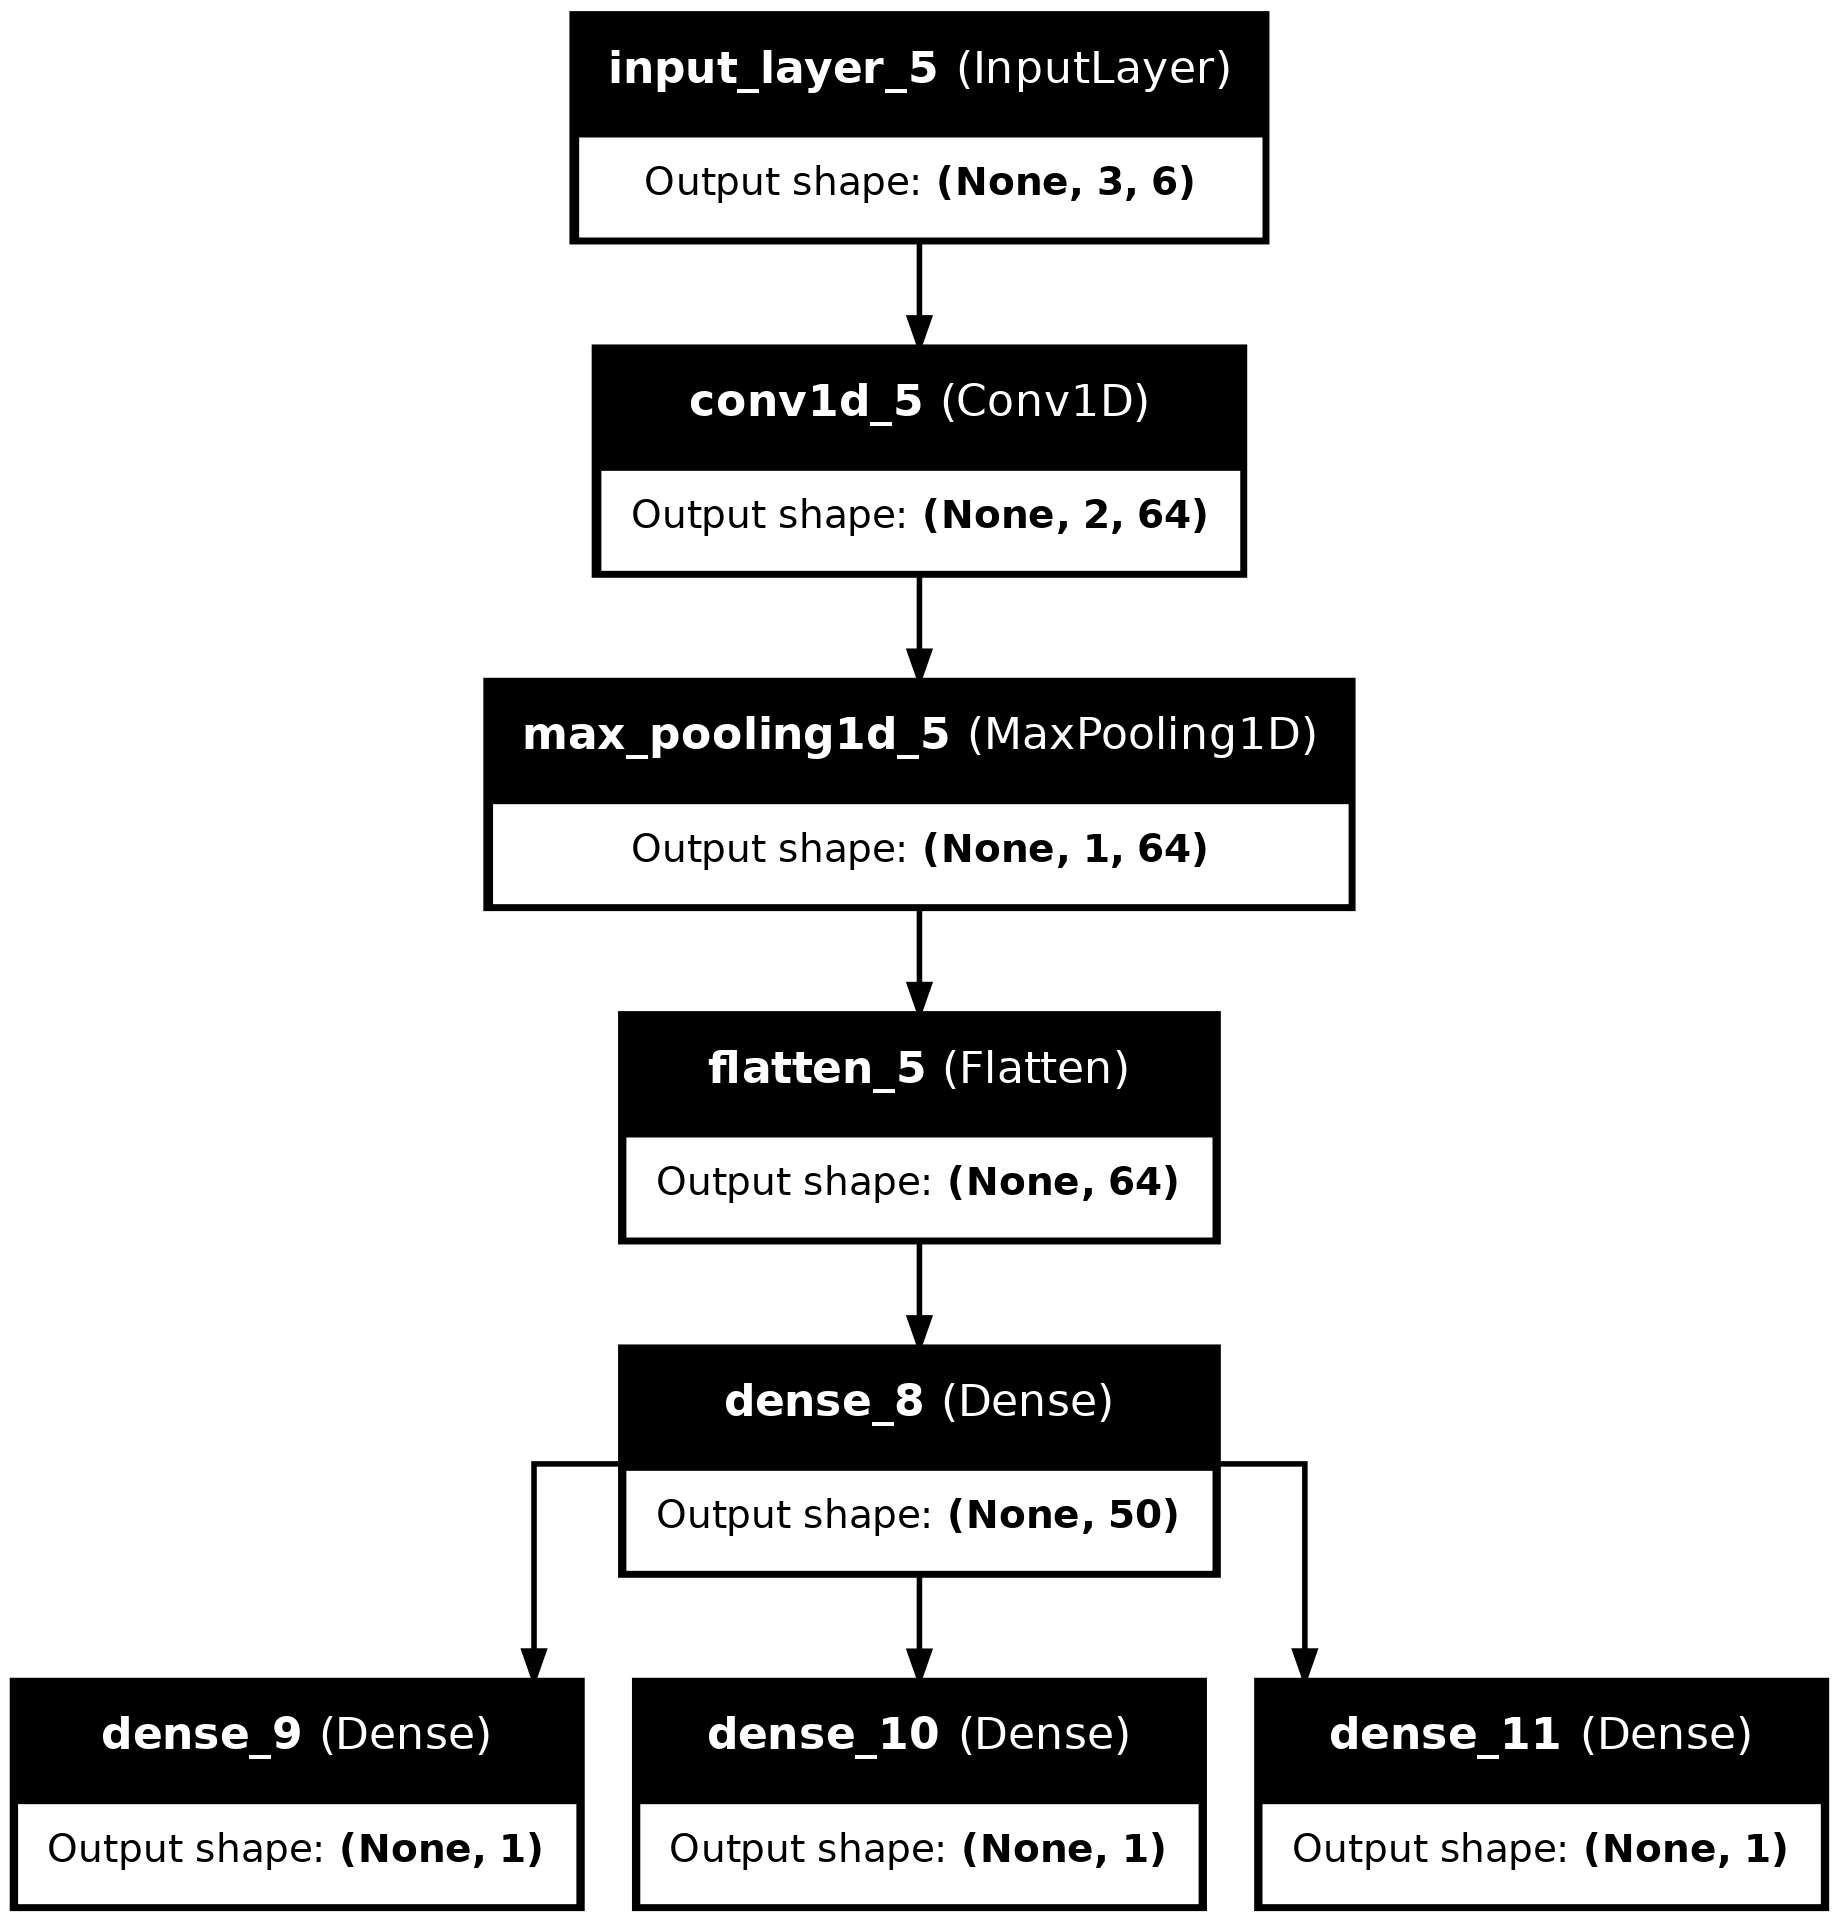

In [42]:
plot_model(model_5, show_shapes=True, show_layer_names=True)

In [43]:
# Separar salidas
y1 = y_m[:, 0].reshape((y_m.shape[0], 1))
y2 = y_m[:, 1].reshape((y_m.shape[0], 1))
y3 = y_m[:, 2].reshape((y_m.shape[0], 1))

In [44]:
# Ajustar el modelo
history_5 = model_5.fit(X_m, [y1,y2,y3], epochs=750, verbose=0)

<Axes: >

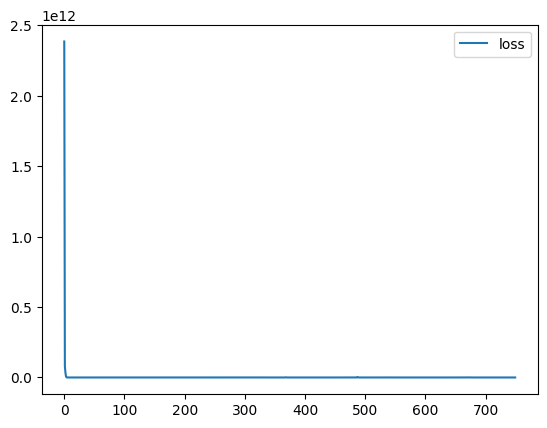

In [45]:
pd.DataFrame(history_5.history).plot()

CNN

In [46]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [49]:
# Probemos la función creada
# Definir secuencia de entrada
raw_seq = df['price'].values
# elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2
# Particionar mis datos
X, y = split_univariate_sequence_m_step(raw_seq, n_steps_in, n_steps_out)
# Resumir los datos
[print(X[i], y[i]) for i in range(len(X))];

[13300000 12250000 12250000] [12215000 11410000]
[12250000 12250000 12215000] [11410000 10850000]
[12250000 12215000 11410000] [10850000 10150000]
[12215000 11410000 10850000] [10150000 10150000]
[11410000 10850000 10150000] [10150000  9870000]
[10850000 10150000 10150000] [9870000 9800000]
[10150000 10150000  9870000] [9800000 9800000]
[10150000  9870000  9800000] [9800000 9681000]
[9870000 9800000 9800000] [9681000 9310000]
[9800000 9800000 9681000] [9310000 9240000]
[9800000 9681000 9310000] [9240000 9240000]
[9681000 9310000 9240000] [9240000 9100000]
[9310000 9240000 9240000] [9100000 9100000]
[9240000 9240000 9100000] [9100000 8960000]
[9240000 9100000 9100000] [8960000 8890000]
[9100000 9100000 8960000] [8890000 8855000]
[9100000 8960000 8890000] [8855000 8750000]
[8960000 8890000 8855000] [8750000 8680000]
[8890000 8855000 8750000] [8680000 8645000]
[8855000 8750000 8680000] [8645000 8645000]
[8750000 8680000 8645000] [8645000 8575000]
[8680000 8645000 8645000] [8575000 8540000

In [50]:
X.shape, y.shape

((541, 3), (541, 2))

In [51]:
# Debemos tranformar nuestro datos de [samples, timesteps] a [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(541, 3, 1)

In [52]:
# Crear nuestro modelo
model_6 = Sequential()
model_6.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

/home/javier/MyDesktop/ICD/6to/MNLP/05_Tarea5/t5/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 2, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,544 (13.84 KB)

 Trainable params: 3,544 (13.84 KB)

 Non-trainable params: 0 (0.00 B)

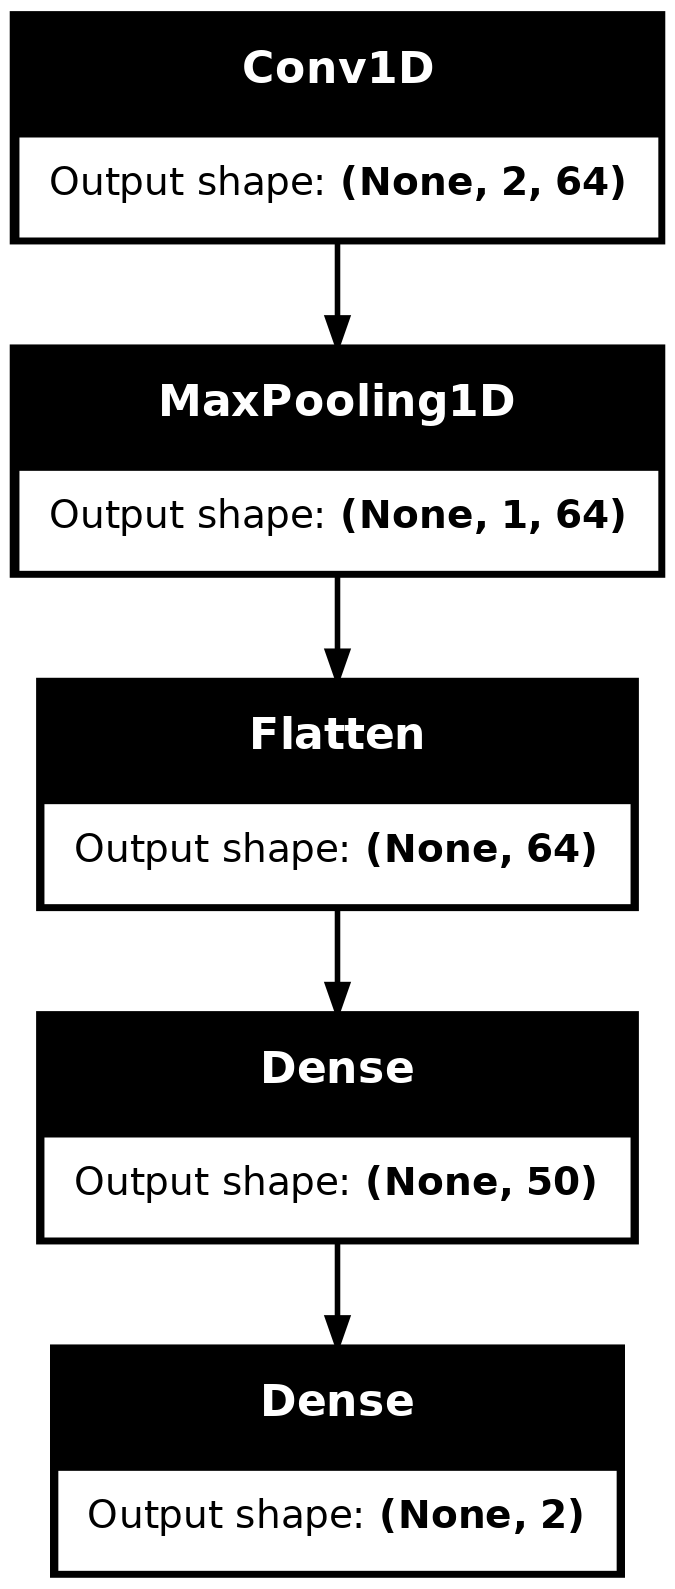

In [53]:
plot_model(model_6, show_layer_names=False, show_shapes=True,)

In [54]:
# fit model
history_6 = model_6.fit(X, y, epochs=750, verbose=0)

<Axes: >

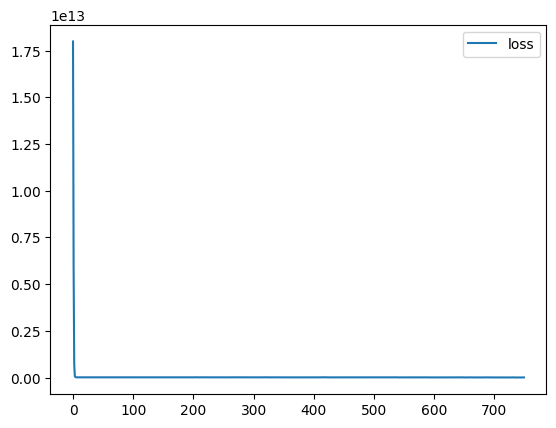

In [55]:
pd.DataFrame(history_6.history).plot()

Multi

In [56]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [60]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2

X, y = split_multivariate_sequence_m_step(df.values, n_steps_in, n_steps_out)

In [61]:
# Mostrar los resultados
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])

(542, 3, 5) (542, 2)
[[7420    4    2    3    2]
 [8960    4    4    4    3]
 [9960    3    2    2    2]] [12250000 12215000]
[[8960    4    4    4    3]
 [9960    3    2    2    2]
 [7500    4    2    2    3]] [12215000 11410000]
[[9960    3    2    2    2]
 [7500    4    2    2    3]
 [7420    4    1    2    2]] [11410000 10850000]
[[7500    4    2    2    3]
 [7420    4    1    2    2]
 [7500    3    3    1    2]] [10850000 10150000]
[[7420    4    1    2    2]
 [7500    3    3    1    2]
 [8580    4    3    4    2]] [10150000 10150000]
[[ 7500     3     3     1     2]
 [ 8580     4     3     4     2]
 [16200     5     3     2     0]] [10150000  9870000]
[[ 8580     4     3     4     2]
 [16200     5     3     2     0]
 [ 8100     4     1     2     2]] [9870000 9800000]
[[16200     5     3     2     0]
 [ 8100     4     1     2     2]
 [ 5750     3     2     4     1]] [9800000 9800000]
[[ 8100     4     1     2     2]
 [ 5750     3     2     4     1]
 [13200     3     1     2     2]

In [62]:
# Mostrar los resultados
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])

(542, 3, 5) (542, 2)
[[7420    4    2    3    2]
 [8960    4    4    4    3]
 [9960    3    2    2    2]] [12250000 12215000]
[[8960    4    4    4    3]
 [9960    3    2    2    2]
 [7500    4    2    2    3]] [12215000 11410000]
[[9960    3    2    2    2]
 [7500    4    2    2    3]
 [7420    4    1    2    2]] [11410000 10850000]
[[7500    4    2    2    3]
 [7420    4    1    2    2]
 [7500    3    3    1    2]] [10850000 10150000]
[[7420    4    1    2    2]
 [7500    3    3    1    2]
 [8580    4    3    4    2]] [10150000 10150000]
[[ 7500     3     3     1     2]
 [ 8580     4     3     4     2]
 [16200     5     3     2     0]] [10150000  9870000]
[[ 8580     4     3     4     2]
 [16200     5     3     2     0]
 [ 8100     4     1     2     2]] [9870000 9800000]
[[16200     5     3     2     0]
 [ 8100     4     1     2     2]
 [ 5750     3     2     4     1]] [9800000 9800000]
[[ 8100     4     1     2     2]
 [ 5750     3     2     4     1]
 [13200     3     1     2     2]

In [63]:
n_features = X.shape[2]

# Definir el modelo 
model_7 = Sequential()
model_7.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer='adam', loss='mse')
# fit model_7
model_7.fit(X, y, epochs=2000, verbose=0)

model_7.summary()

/home/javier/MyDesktop/ICD/6to/MNLP/05_Tarea5/t5/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 2, 64)          │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,170 (47.54 KB)

 Trainable params: 4,056 (15.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,114 (31.70 KB)

In [66]:
df.values

array([[    7420,        4,        2,        3,        2, 13300000],
       [    8960,        4,        4,        4,        3, 12250000],
       [    9960,        3,        2,        2,        2, 12250000],
       ...,
       [    3620,        2,        1,        1,        0,  1750000],
       [    2910,        3,        1,        1,        0,  1750000],
       [    3850,        3,        1,        2,        0,  1750000]])

multiple

In [69]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [70]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2

X, y = split_multivariate_sequence_m_step_parallel(df.values, n_steps_in, n_steps_out)

In [71]:
# Mostrar los resultados
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])

(541, 3, 6) (541, 2, 6)
[[    7420        4        2        3        2 13300000]
 [    8960        4        4        4        3 12250000]
 [    9960        3        2        2        2 12250000]] [[    7500        4        2        2        3 12215000]
 [    7420        4        1        2        2 11410000]]
[[    8960        4        4        4        3 12250000]
 [    9960        3        2        2        2 12250000]
 [    7500        4        2        2        3 12215000]] [[    7420        4        1        2        2 11410000]
 [    7500        3        3        1        2 10850000]]
[[    9960        3        2        2        2 12250000]
 [    7500        4        2        2        3 12215000]
 [    7420        4        1        2        2 11410000]] [[    7500        3        3        1        2 10850000]
 [    8580        4        3        4        2 10150000]]
[[    7500        4        2        2        3 12215000]
 [    7420        4        1        2        2 11410000]
 

In [72]:
# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
y.shape

(541, 12)

In [73]:
n_features = X.shape[2]

# Definimos nuestro modelo
model_8 = Sequential()
model_8.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_8.add(MaxPooling1D())
model_8.add(Flatten())
model_8.add(Dense(50, activation='relu'))
model_8.add(Dense(n_output))
model_8.compile(optimizer='adam', loss='mse')

# fit model_8
history_8 = model_8.fit(X, y, epochs=1000, verbose=0)

/home/javier/MyDesktop/ICD/6to/MNLP/05_Tarea5/t5/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


<Axes: >

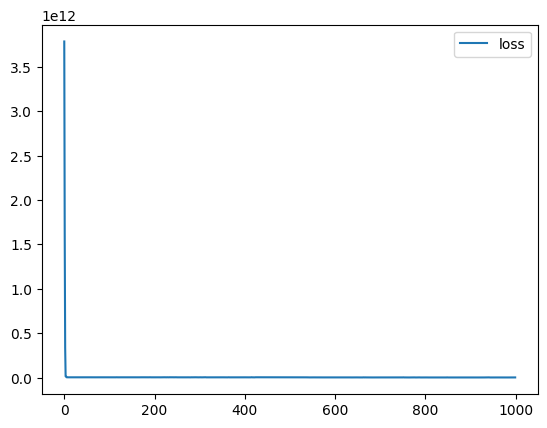

In [74]:
pd.DataFrame(history_8.history).plot()

In [76]:
n_steps_in = 3
n_features = 6
# Seleccionar una muestra de tus datos de entrada
x_sample = X[0] 

# Reshape para que coincida con el formato de entrada del modelo
x_input = x_sample.reshape((1, n_steps_in, n_features))
# Predecir usando el modelo
yhat = model_8.predict(x_input, verbose=0)
print(yhat)

[[ 1.5006426e+04  6.9048120e+02 -3.4869062e+03  2.8320371e+03
   5.2326398e+02  1.1669723e+07  2.4451266e+04  6.1022100e+03
  -4.2228945e+03  8.1360273e+03  3.1204526e+03  1.1265755e+07]]


In [77]:
yhat.shape

(1, 12)

In [78]:
[yhat[i].reshape(n_steps_out, n_features) for i in range(yhat.shape[0])]

[array([[ 1.5006426e+04,  6.9048120e+02, -3.4869062e+03,  2.8320371e+03,
          5.2326398e+02,  1.1669723e+07],
        [ 2.4451266e+04,  6.1022100e+03, -4.2228945e+03,  8.1360273e+03,
          3.1204526e+03,  1.1265755e+07]], dtype=float32)]